In [1]:
import numpy as np
import argparse
import os, time

from pytamp.benchmark import Rearrange1
from pykin.utils import plot_utils as p_utils

from pytamp.benchmark.rearrange1 import make_scene
from pytamp.search.mcts_for_rearragement import MCTS_rearrangement


In [2]:
def get_parser():
    parser = argparse.ArgumentParser(description="Test Rearragement 1.")
    parser.add_argument("--budgets", metavar="T", type=int, default=100, help="Horizon")
    parser.add_argument("--max_depth", metavar="H", type=int, default=10, help="Max depth")
    parser.add_argument("--seed", metavar="i", type=int, default=2, help="A random seed")
    parser.add_argument(
        "--algo",
        metavar="alg",
        type=str,
        default="bai_perturb",
        choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
        help="Choose one (bai_perturb, bai_ucb, uct)",
    )
    parser.add_argument(
        "--debug_mode", default=False, type=lambda x: (str(x).lower() == "true"), help="Debug mode"
    )
    parser.add_argument("--box_number", metavar="N", type=int, default=6, help="Box Number(6 or less)")
    try:
        args = parser.parse_args() #call from command line
    except:
        args = parser.parse_args(args=[]) #call from notebook
    return args 

In [3]:
args = get_parser() 

debug_mode = args.debug_mode
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
number = args.box_number
np.random.seed(seed)

usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
                             [--box_number N]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/juju/.local/share/jupyter/runtime/kernel-f15cac86-8765-4216-8857-41f51aab3b4f.json


In [4]:
object_names, init_scene, goal_scene = make_scene()
rearrangement1 = Rearrange1('doosan', object_names, init_scene, goal_scene, is_pyplot=False)

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []

# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)


*********************** Logical States ***********************
OrderedDict([('ben_cube0',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('bottle0',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('ben_cube1',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('bottle1',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('table',
              {'static': True,
               'support': [Object(name=ben_cube0, pos=[0.84763533 0.36753831 0.84779998]),
                           Object(name=bottle0, pos=[ 0.96018324 -0.14158488  0.83593754]),
                           Object(name=ben_cube1, pos=[0.49591774 0.45601634 0.84779998]),
                           Object(name=bottle1, pos=[0.46325373 0.53921387 0.83593754])]}),
             ('robotiq140_gripper', {'holding': None})])
***************************************************************

*******

# Start Scene 

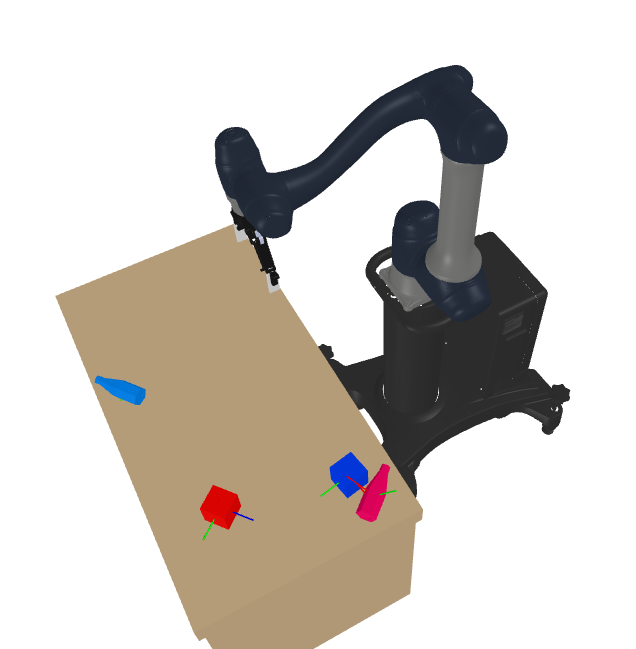

{'table': Object(name=table, pos=[ 1.    -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[ 0.44206894 -0.126474    0.84779998]), 'bottle0': Object(name=bottle0, pos=[ 0.930512   -0.56843727  0.87515735]), 'ben_cube1': Object(name=ben_cube1, pos=[ 0.96368901 -0.17549193  0.84779998]), 'bottle1': Object(name=bottle1, pos=[ 0.79003593 -0.54256085  0.87515735])}


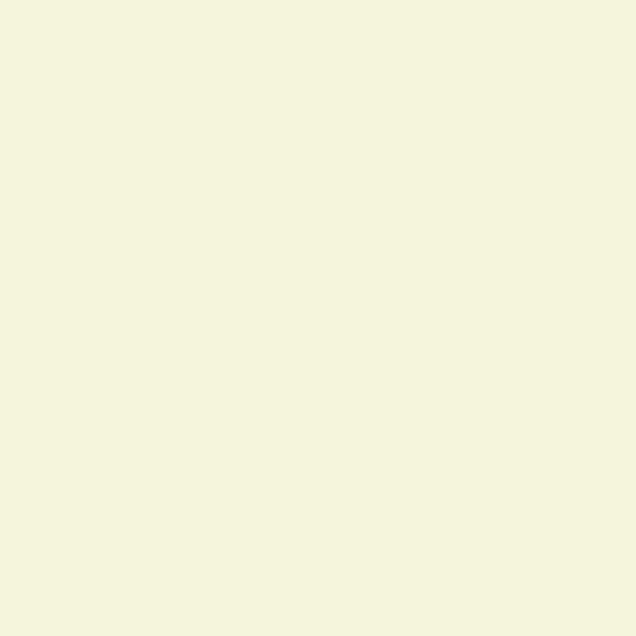

In [21]:
#######################
fig, ax = p_utils.init_3d_figure(name="Rearrangement 1")
# init_scene
rearrangement1.scene_mngr.render_scene(ax)
rearrangement1.render_axis(rearrangement1.scene_mngr)
rearrangement1.scene_mngr.show()

# Goal Scene 

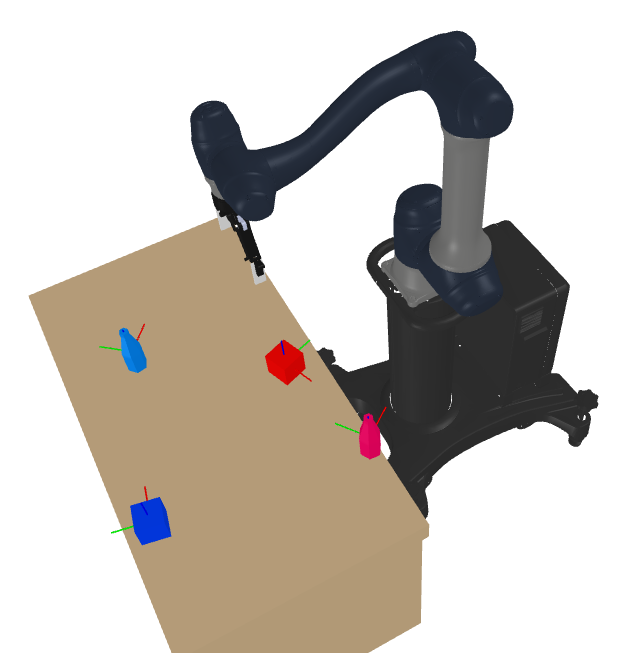

In [20]:
# goal_scene
rearrangement1.goal_scene_mngr.render_scene(ax)
rearrangement1.render_axis(rearrangement1.goal_scene_mngr)
rearrangement1.goal_scene_mngr.show()

{'table': Object(name=table, pos=[ 1.    -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[0.71176326 0.47034458 0.84779998]), 'bottle0': Object(name=bottle0, pos=[0.39660049 0.47888803 0.87515735]), 'ben_cube1': Object(name=ben_cube1, pos=[ 0.40009891 -0.05425357  0.84779998]), 'bottle1': Object(name=bottle1, pos=[ 0.64091543 -0.37802097  0.87515735])}


In [40]:
c_list[6]

4.6415888336127775

In [48]:
c = 2
idx = 0
mcts = MCTS_rearrangement(
        scene_mngr=rearrangement1.scene_mngr,
        init_scene=rearrangement1.init_scene,
        sampling_method=args.algo,
        budgets=args.budgets,
        max_depth=args.max_depth,
        c=c,
        debug_mode=args.debug_mode,
    )
mcts.only_optimize_1 = False

In [49]:
start_time = time.time()
for i in range(budgets):
    print(
        f"\n[{idx+1}/{len(c_list)}] Benchmark: {rearrangement1.scene_mngr.scene.bench_num}, Algo: {algo}, C: {c}, Seed: {seed}"
    )
    mcts.do_planning_rearrange(i)

    print("########### Running time : ", time.time()- start_time, "##############")
    final_level_1_values.append(mcts.values_for_level_1)



[1/10] Benchmark: 0, Algo: bai_perturb, C: 2, Seed: 2
=========== Search iteration : 1 ===========
###### check_goal :  False
[Action] Rearr ben_cube1
Good Action
[Reward] S(0) -> A(3) -> S'(6) Reward : 10.0
###### check_goal :  False
[Action] Rearr bottle0
Good Action
[Reward] S(6) -> A(8) -> S'(12) Reward : 5.0
###### check_goal :  False
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(12) -> A(13) -> S'(17) Reward : -1
###### check_goal :  False
[Action] Rearr ben_cube1
not bad Action
[Reward] S(17) -> A(21) -> S'(24) Reward : -1
###### check_goal :  False
[Action] Rearr bottle1
placed another place not goal
[Reward] S(24) -> A(28) -> S'(29) Reward : -1
###### check_goal :  False
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(29) -> A(31) -> S'(35) Reward : -1
###### check_goal :  False
[Action] Rearr ben_cube1
not bad Action
[Reward] S(35) -> A(39) -> S'(42) Reward : -1
###### check_goal :  False
[Action] Rearr ben_cube1
Bad Action
[Reward] S(42

not bad Action
[Reward] S(197) -> A(199) -> S'(204) Reward : -1
###### check_goal :  False
[Action] Rearr ben_cube0
Bad Action
[Reward] S(204) -> A(205) -> S'(209) Reward : -5.714
###### check_goal :  False
[Action] Rearr bottle0
not bad Action
[Reward] S(209) -> A(212) -> S'(216) Reward : -1
###### check_goal :  False
[Action] Rearr ben_cube1
not bad Action
[Reward] S(216) -> A(219) -> S'(222) Reward : -1
###### check_goal :  False
[Action] Rearr bottle1
Good Action
[Reward] S(222) -> A(226) -> S'(228) Reward : 1.0
###### check_goal :  False
Exceeded the maximum depth!!
########### Running time :  5.4389729499816895 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2, Seed: 2
=========== Search iteration : 82 ===========
###### check_goal :  False
[Action] Rearr bottle0
Good Action
[Reward] S(0) -> A(2) -> S'(174) Reward : 10.0
###### check_goal :  False
[Action] Rearr ben_cube1
Good Action
[Reward] S(174) -> A(177) -> S'(180) Reward : 5.0
###### check_goal :  False
[Action] 

In [55]:
max_level_1_value = mcts.get_max_value_level_1()
max_level_1_value

23.0

In [56]:
leaf_node = mcts.success_level_1_leaf_node
leaf_node

198

In [57]:
leaf_node

198

In [58]:
mcts.history_level_1_optimal_nodes

[[0, 2, 174, 177, 180, 182, 186, 187, 192, 196, 198]]

In [59]:
mcts.tree.nodes[0]

{'depth': 0,
 'state': <pytamp.scene.scene.Scene at 0x7f858d0ba9d0>,
 'action': None,
 'reward': 0,
 'value': 23.0,
 'value_history': [2.0000000000000018,
  -5.7976190476190474,
  -6.972222222222221,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  6.785714285714288,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0],
 'visit': 